In [ ]:
import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Libraries for Classification and building Models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
import os
import librosa
import librosa.display
import glob 
import skimage

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#! kaggle datasets download chrisfilo/urbansound8k

100% 5.61G/5.61G [03:30<00:00, 28.7MB/s]
100% 5.61G/5.61G [03:30<00:00, 28.6MB/s]


In [ ]:
#! unzip urbansound8k.zip

Streaming output truncated to the last 5000 lines.
  inflating: fold4/151877-5-1-0.wav  
  inflating: fold4/154758-5-0-0.wav  
  inflating: fold4/154758-5-0-1.wav  
  inflating: fold4/154758-5-0-10.wav  
  inflating: fold4/154758-5-0-11.wav  
  inflating: fold4/154758-5-0-12.wav  
  inflating: fold4/154758-5-0-13.wav  
  inflating: fold4/154758-5-0-14.wav  
  inflating: fold4/154758-5-0-15.wav  
  inflating: fold4/154758-5-0-16.wav  
  inflating: fold4/154758-5-0-17.wav  
  inflating: fold4/154758-5-0-18.wav  
  inflating: fold4/154758-5-0-19.wav  
  inflating: fold4/154758-5-0-2.wav  
  inflating: fold4/154758-5-0-20.wav  
  inflating: fold4/154758-5-0-21.wav  
  inflating: fold4/154758-5-0-3.wav  
  inflating: fold4/154758-5-0-4.wav  
  inflating: fold4/154758-5-0-5.wav  
  inflating: fold4/154758-5-0-6.wav  
  inflating: fold4/154758-5-0-7.wav  
  inflating: fold4/154758-5-0-8.wav  
  inflating: fold4/154758-5-0-9.wav  
  inflating: fold4/155320-3-0-0.wav  
  inflating: fold4/156362

In [ ]:
df = pd.read_csv("/content/UrbanSound8K.csv")

'''We will extract classes from this metadata.'''

df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
dat1, sampling_rate1 = librosa.load('/content/fold1/101415-3-0-2.wav')
dat2, sampling_rate2 = librosa.load('/content/fold1/102305-6-0-0.wav')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

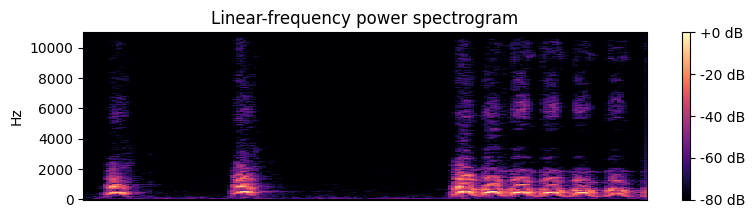

In [ ]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [ ]:
dat1, sampling_rate1 = librosa.load('/content/fold1/101415-3-0-2.wav')
arr = librosa.feature.mfcc(y=dat1, sr=sampling_rate1)
arr.shape

(20, 173)

In [ ]:
feature = []
label = []

def parser(row):
    # Function to load files and extract features
    for i in range(8732):
        file_name = '/content/fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
        # Here kaiser_fast is a technique used for faster extraction
        X, sample_rate = librosa.load(file_name) 
        # We extract mfcc feature from data
        mels = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate).T,axis=0)        
        feature.append(mels)
        label.append(df["classID"][i])
    return [feature, label]

In [ ]:
temp = parser(df)

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


In [ ]:
temp = np.array(temp)
data = temp.transpose()

<ipython-input-41-16088c198d1d>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(temp)


In [ ]:
X_ = data[:, 0]
Y = data[:, 1]
print(X_.shape, Y.shape)
X = np.empty([8732, 128])

(8732,) (8732,)


In [ ]:
Y = to_categorical(Y)

In [ ]:
'''Final Data'''
print(X.shape)
print(Y.shape)

(8732, 128)
(8732, 10)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)

In [ ]:
X_train = X_train.reshape(6549, 16, 8, 1)
X_test = X_test.reshape(2183, 16, 8, 1)

In [ ]:
input_dim = (16, 8, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding = "same", activation = "tanh", input_shape = input_dim))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding = "same", activation = "tanh"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1024, activation = "tanh"))
model.add(Dense(10, activation = "softmax"))

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history=model.fit(X_train, Y_train, epochs = 10, batch_size = 50, validation_data = (X_test, Y_test))

Epoch 1/10
131/131 [==============================] - 15s 113ms/step - loss: 2.2609 - accuracy: 0.1162 - val_loss: 2.2666 - val_accuracy: 0.1168
Epoch 2/10
131/131 [==============================] - 11s 80ms/step - loss: 2.2612 - accuracy: 0.1139 - val_loss: 2.2690 - val_accuracy: 0.1168
Epoch 3/10
131/131 [==============================] - 8s 59ms/step - loss: 2.2598 - accuracy: 0.1113 - val_loss: 2.2687 - val_accuracy: 0.1090
Epoch 4/10
131/131 [==============================] - 11s 82ms/step - loss: 2.2608 - accuracy: 0.1115 - val_loss: 2.2683 - val_accuracy: 0.1219
Epoch 5/10
131/131 [==============================] - 9s 67ms/step - loss: 2.2587 - accuracy: 0.1144 - val_loss: 2.2723 - val_accuracy: 0.1067
Epoch 6/10
131/131 [==============================] - 10s 74ms/step - loss: 2.2603 - accuracy: 0.1138 - val_loss: 2.2677 - val_accuracy: 0.1090
Epoch 7/10
131/131 [==============================] - 13s 97ms/step - loss: 2.2601 - accuracy: 0.1113 - val_loss: 2.2810 - val_accuracy: 

In [ ]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print("loss:",score[0])
print("Accuracy:",score[1]*100)

69/69 [==============================] - 1s 15ms/step - loss: 2.2716 - accuracy: 0.1067
loss: 2.2715768814086914
Accuracy: 10.673385113477707


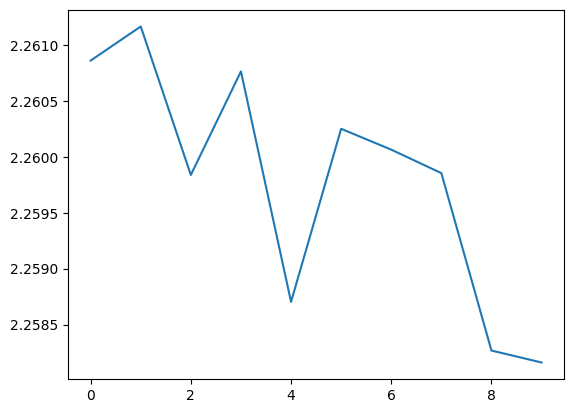

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()